In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-classification-dataset-csv/emails.csv


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [6]:
raw_df = pd.read_csv('/kaggle/input/email-spam-classification-dataset-csv/emails.csv')

In [7]:
raw_df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [8]:
raw_df = raw_df.drop(columns = ['Email No.'])
raw_df = raw_df.replace(r'[^\d.]+', value = float('nan'), regex = True)
raw_df.fillna(0, inplace = True)
raw_df = raw_df.astype(int)

In [9]:
X = raw_df.iloc[:, :-1].values
y = raw_df.iloc[:, -1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
results = {}

In [17]:
#Logistic Regression

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

y_pred_LR = model_LR.predict(X_test)

accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR)
recall_LR = recall_score(y_test, y_pred_LR)
f1_LR = f1_score(y_test, y_pred_LR)

results["Logistic Regression"] = {"accuracy": accuracy_LR, 
                                  "precision": precision_LR, 
                                  "recall": recall_LR, 
                                  "f1_score": f1_LR
                                 }

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#KNN

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

y_pred_KNN = model_KNN.predict(X_test)

accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
f1_KNN = f1_score(y_test, y_pred_KNN)

results["KNN"] = {"accuracy": accuracy_KNN, 
                  "precision": precision_KNN, 
                  "recall": recall_KNN, 
                  "f1_score": f1_KNN
                 }

In [20]:
#SVM

model_SVM = SVC()
model_SVM.fit(X_train, y_train)

y_pred_SVM = model_SVM.predict(X_test)

accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
precision_SVM = precision_score(y_test, y_pred_SVM)
recall_SVM = recall_score(y_test, y_pred_SVM)
f1_SVM = f1_score(y_test, y_pred_SVM)

results["SVM"] = {"accuracy": accuracy_SVM, 
                  "precision": precision_SVM, 
                  "recall": recall_SVM, 
                  "f1_score": f1_SVM
                 }

In [21]:
#Naive Bayes

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

y_pred_NB = model_NB.predict(X_test)

accuracy_NB = accuracy_score(y_test, y_pred_NB)
precision_NB = precision_score(y_test, y_pred_NB)
recall_NB = recall_score(y_test, y_pred_NB)
f1_NB = f1_score(y_test, y_pred_NB)

results["Naive Bayes"] = {"accuracy": accuracy_NB, 
                          "precision": precision_NB, 
                          "recall": recall_NB, 
                          "f1_score": f1_NB
                         }

In [22]:
#Decision Tree

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

y_pred_DT = model_DT.predict(X_test)

accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test, y_pred_DT)

results["Decision Tree"] = {"accuracy": accuracy_DT, 
                            "precision": precision_DT, 
                            "recall": recall_DT, 
                            "f1_score": f1_DT
                           }

In [23]:
#Random Forest

model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

y_pred_RF = model_RF.predict(X_test)

accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)

results["Random Forest"] = {"accuracy": accuracy_RF, 
                            "precision": precision_RF, 
                            "recall": recall_RF, 
                            "f1_score": f1_RF
                           }

In [24]:
results

{'Logistic Regression': {'accuracy': 0.9681159420289855,
  'precision': 0.9283387622149837,
  'recall': 0.9628378378378378,
  'f1_score': 0.945273631840796},
 'KNN': {'accuracy': 0.8628019323671497,
  'precision': 0.7251461988304093,
  'recall': 0.8378378378378378,
  'f1_score': 0.7774294670846394},
 'SVM': {'accuracy': 0.8173913043478261,
  'precision': 0.9083969465648855,
  'recall': 0.40202702702702703,
  'f1_score': 0.5573770491803279},
 'Naive Bayes': {'accuracy': 0.9478260869565217,
  'precision': 0.8711656441717791,
  'recall': 0.9594594594594594,
  'f1_score': 0.9131832797427653},
 'Decision Tree': {'accuracy': 0.9227053140096618,
  'precision': 0.8529411764705882,
  'recall': 0.8817567567567568,
  'f1_score': 0.867109634551495},
 'Random Forest': {'accuracy': 0.9816425120772947,
  'precision': 0.9601328903654485,
  'recall': 0.9763513513513513,
  'f1_score': 0.9681742043551089}}

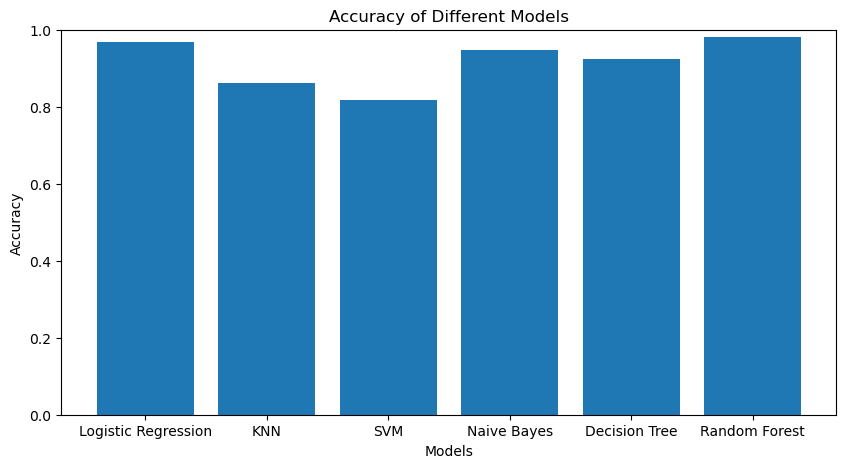

In [27]:
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), [result['accuracy'] for result in results.values()])
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

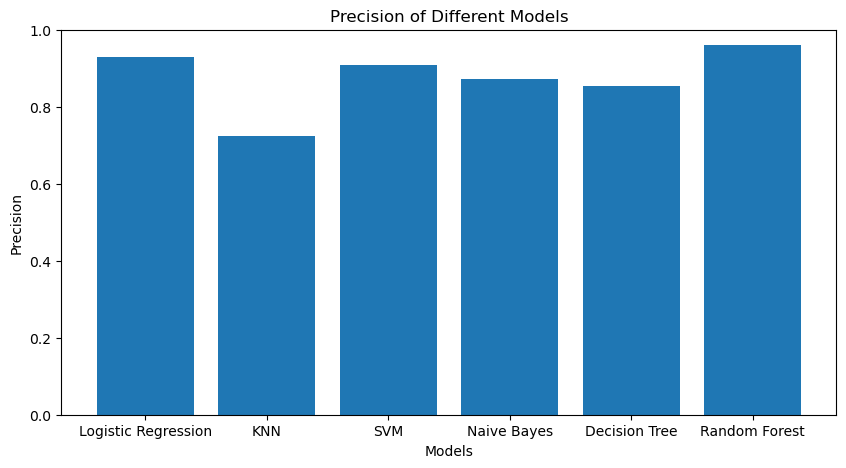

In [28]:
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["precision"] for result in results.values()])
plt.title("Precision of Different Models")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.show()

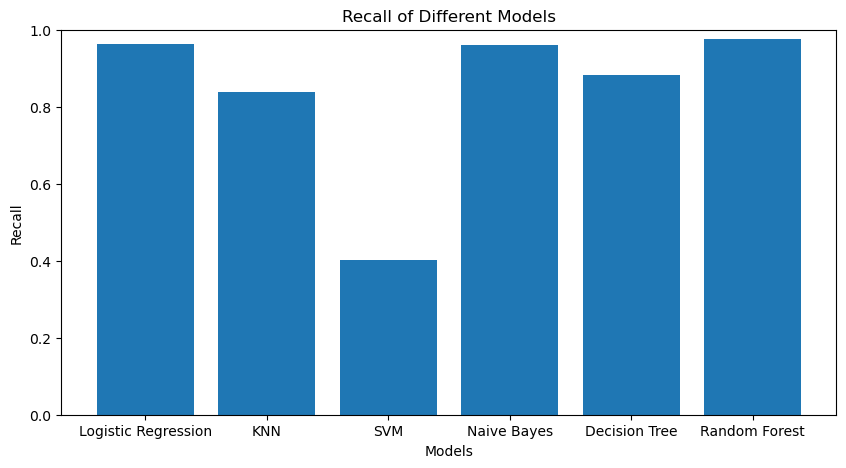

In [29]:
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["recall"] for result in results.values()])
plt.title("Recall of Different Models")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.show()

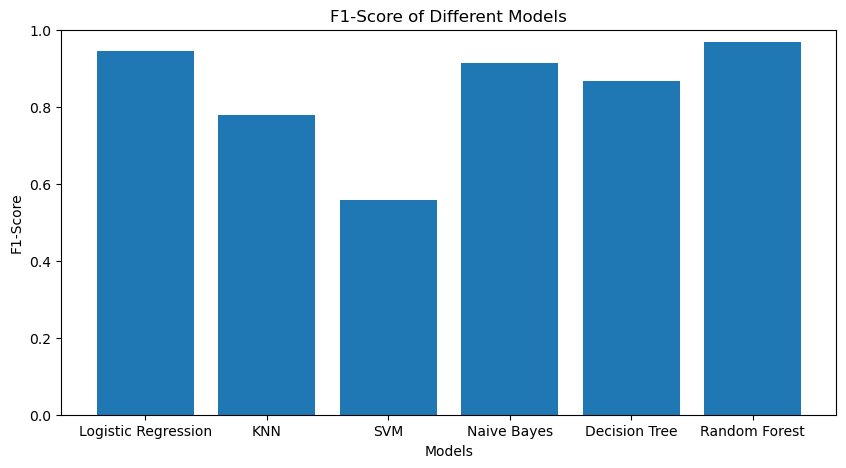

In [30]:
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["f1_score"] for result in results.values()])
plt.title("F1-Score of Different Models")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.show()

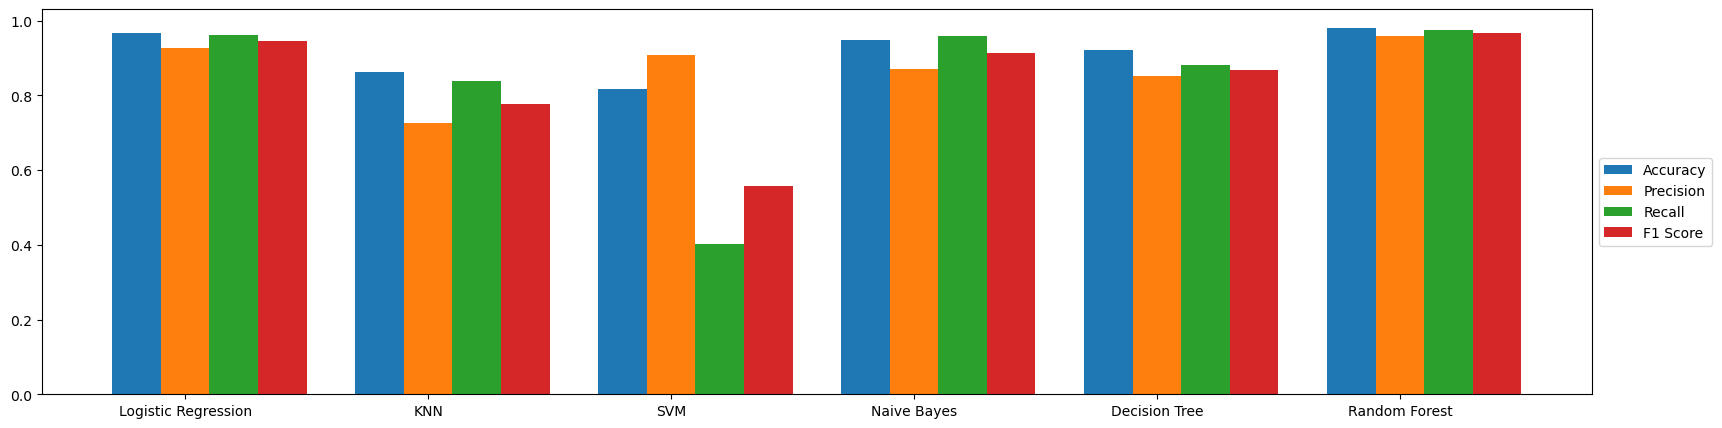

In [34]:
accuracies = [results[model]['accuracy'] for model in results]
precisions = [results[model]['precision'] for model in results]
recalls = [results[model]['recall'] for model in results]
f1_scores = [results[model]['f1_score'] for model in results]

plt.figure(figsize = (20, 5))
bar_width = 0.2
index = np.arange(len(results))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')

plt.xticks(index + bar_width, list(results.keys()))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()